## Quiz #0307

### "EDA and ANOVA for guinea pig tooth growth"

In [197]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
%matplotlib inline

#### Answer the following questions by providing Python code:

We will use the dataset "data_ToothGrowth.csv". 
- len = teeth length. 
- supp = supplementary type with two possible values: VC (vitamin C) or OJ (orange juice). 
- dose (mgr/day) = dosage per day with three possible values: 0.5, 1.0, 2.0.

In [198]:
df = pd.read_csv('data_ToothGrowth.csv', header='infer')

In [199]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   len     60 non-null     float64
 1   supp    60 non-null     object 
 2   dose    60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


1). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'supp' variable. <br>
Summarize the result.

In [201]:
# Categories of 'supp'. 
df.supp.value_counts()

VC    30
OJ    30
Name: supp, dtype: int64

In [202]:
# Group by category.
df.supp.groupby(df.dose).value_counts()

dose  supp
0.5   OJ      10
      VC      10
1.0   OJ      10
      VC      10
2.0   OJ      10
      VC      10
Name: supp, dtype: int64

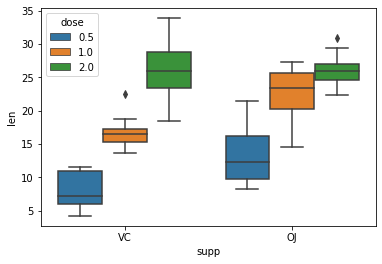

In [203]:
# Multiple Boxplots.
import seaborn as sns
sns.boxplot(x='supp',y='len',data=df,hue='dose')


In [204]:
# ANOVA.
res = st.f_oneway(df.supp=='VC',df.supp=='OJ')

print("Test statictic  : %f " % res[0] )
print("p-value         : %f " % res[1] )

Test statictic  : 0.000000 
p-value         : 1.000000 


In [205]:
# Result summary.
#pvalue=1>0.05 so we conclude that the means of the 2 supplements are not equal to 100%.

2). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'dose' variable. <br>
Summarize the result.

In [206]:
# Categories of 'dose'. 
df.dose.value_counts()

2.0    20
1.0    20
0.5    20
Name: dose, dtype: int64

In [207]:
# Group by category.
df.dose.groupby(df.supp).value_counts()

supp  dose
OJ    0.5     10
      1.0     10
      2.0     10
VC    0.5     10
      1.0     10
      2.0     10
Name: dose, dtype: int64

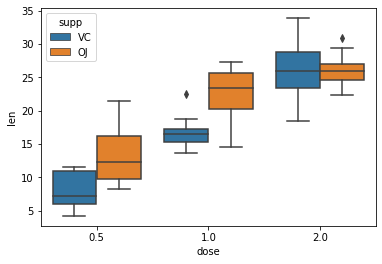

In [208]:
# Multiple Boxplots.
sns.boxplot(x='dose',y='len',data=df,hue='supp')

In [209]:
# ANOVA.
df.dose=str(df.dose)
res = st.f_oneway(df.dose=='0.5',df.dose=='1.0',df.dose=='2.0')

print("Test statictic  : %f " % res[0] )
print("p-value         : %f " % res[1] )

Test statictic  : nan 
p-value         : nan 


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3349: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


In [210]:
# Result summary.
